# NLP techniques for ontology construction

In [2]:
# ! pip install openpyxl --upgrade
# ! pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.1 MB/s eta 0:00:00a 0:00:01


In [1]:
import pandas as pd
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.util import ngrams
import re
import string

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/katonazsofia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading the dataset

In [3]:
df = pd.read_excel("taxonomy.xlsx")

In [4]:
# select manufacturing column
df_construction = df[df["Sector"] == "Construction and real estate"]

In [5]:
df_construction.head()

,NACE,Sector,Activity number,Activity,Contribution type,Description,Substantial contribution criteria,DNSH on Climate adaptation,DNSH on Water,DNSH on Circular economy,DNSH on Pollution prevention,DNSH on Biodiversity,Unnamed: 12,Footnotes
82,"F41.1, F41.2, F43",Construction and real estate,7.1,Construction of new buildings,NaN,Development of building projects for residenti...,Constructions of new buildings for which:1. Th...,The activity complies with the criteria set ou...,"Where installed, except for installations in r...",At least 70 % (by weight) of the non-hazardous...,Building components and materials used in the ...,The activity complies with the criteria set ou...,NaN,(290) The calculated amount of energy needed t...
83,"F41, F43",Construction and real estate,7.2,Renovation of existing buildings,Transitional,Construction and civil engineering works or pr...,The building renovation complies with the appl...,The activity complies with the criteria set ou...,Where installed as part of the renovation work...,At least 70 % (by weight) of the non-hazardous...,Building components and materials used in the ...,N/A.,NaN,(307) As set in the applicable national and re...
84,"F42, F43, M71, C16, C17, C22, C23, C25, C27, C...",Construction and real estate,7.3,"Installation, maintenance and repair of energy...",Enabling,Individual renovation measures consisting in i...,The activity consists in one of the following ...,The activity complies with the criteria set ou...,NaN,NaN,Building components and materials comply with ...,NaN,NaN,NaN
85,"F42, F43, M71, C16, C17, C22, C23, C25, C27, C28",Construction and real estate,7.4,"Installation, maintenance and repair of chargi...",Enabling,"Installation, maintenance and repair of chargi...","Installation, maintenance or repair of chargin...",The activity complies with the criteria set ou...,NaN,NaN,NaN,NaN,NaN,NaN
86,"F42, F43, M71, C16, C17, C22, C23, C25, C27, C28",Construction and real estate,7.5,"Installation, maintenance and repair of instru...",Enabling,"Installation, maintenance and repair of instru...",The activity consists in one of the following ...,The activity complies with the criteria set ou...,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Handle missing values (in an ugly way for now)
df_construction.fillna(".", inplace=True)

/var/folders/t3/fn5x2gps4wq728lxf9qrv_lm0000gn/T/ipykernel_71386/2983096504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_construction.fillna(".", inplace=True)


## Checking most frequent words

In [7]:
# Create set of stopwords
stop_words = set(stopwords.words('english'))

In [8]:
def get_words_from_column(column, dataframe):

    # select the sentences
    sentences = []

    # split column into sentences
    for i in dataframe[column]:
        sentences.append(i.lower().split())
        
    # select words from sentences and make lower case
    words = [word.lower() for sentence in sentences for word in sentence]

    # remove stopwords
    words = [word for word in words if word not in stop_words]
    
    return words

In [9]:
# choose column to extract words from
words = get_words_from_column("Substantial contribution criteria", df_construction)

words[:15]

['constructions',
 'new',
 'buildings',
 'which:1.',
 'primary',
 'energy',
 'demand',
 '(ped)(290),',
 'defining',
 'energy',
 'performance',
 'building',
 'resulting',
 'construction,',
 'least']

In [10]:
def word_counter(words):
    wordfreq = {}
    
    # count the words
    for word in words:
        wordfreq[word] = wordfreq.get(word, 0) + 1
        
    return wordfreq    

In [11]:
wordfreq = word_counter(words)

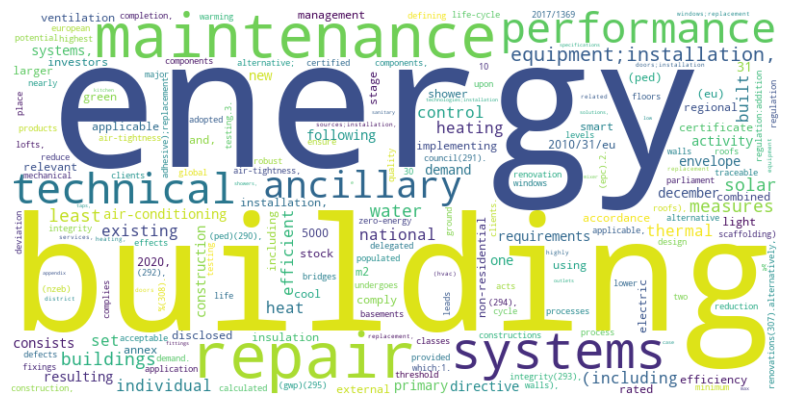

In [12]:
# Generate the word cloud from the dictionary
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordfreq)

# Plot the WordCloud image using the default Matplotlib font
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Display the WordCloud
plt.show()

## Inspecting sentences

In [13]:
def get_sentences_from_column(column, dataframe, printing=False):

    sentences = []

    for text in dataframe[column].dropna():
        sentences.extend(sent_tokenize(text))


    if printing:
        for idx, sentence in enumerate(sentences, start=1):
            print(f"{idx}. {sentence}")

    return sentences

In [14]:
sentences = get_sentences_from_column('Substantial contribution criteria', 
                                      df_construction, printing=True)

1. Constructions of new buildings for which:1.
2. The Primary Energy Demand (PED)(290), defining the energy performance of the building resulting from the construction, is at least 10 % lower than the threshold set for the nearly zero-energy building (NZEB) requirements in national measures implementing Directive 2010/31/EU of the European Parliament and of the Council(291).
3. The energy performance is certified using an as built Energy Performance Certificate (EPC).2.
4. For buildings larger than 5000 m2 (292), upon completion, the building resulting from the construction undergoes testing for air-tightness and thermal integrity(293), and any deviation in the levels of performance set at the design stage or defects in the building envelope are disclosed to investors and clients.
5. As an alternative; where robust and traceable quality control processes are in place during the construction process this is acceptable as an alternative to thermal integrity testing.3.
6. For buildings la

In [15]:
# Finding sentences with numerical information.

# Pattern is a number in a sentence
# BUT the numbers should not stand in brackets alone, as those refer to footnotes (e.g., (296))
# BUT the numbers should not be adjoint with a /, as those indicate regulations (e.g., 2010/30/EU)
# pattern = re.compile(r'\b\d{2,}(?!(\)|/))\b|\b\d+\([^\)]*\)(?!\d)|(?<!/)\b\d{2,}(?!\d)\b')

pattern = re.compile(r'(?<!\()(?<!/)\b\d+\b(?!\))(?!/)')

sentences_w_nrs = [sentence for sentence in sentences if pattern.search(sentence)]

for idx, sentence in enumerate(sentences_w_nrs, start=1):
    print(f"{idx}. {sentence}")

1. Constructions of new buildings for which:1.
2. The Primary Energy Demand (PED)(290), defining the energy performance of the building resulting from the construction, is at least 10 % lower than the threshold set for the nearly zero-energy building (NZEB) requirements in national measures implementing Directive 2010/31/EU of the European Parliament and of the Council(291).
3. The energy performance is certified using an as built Energy Performance Certificate (EPC).2.
4. For buildings larger than 5000 m2 (292), upon completion, the building resulting from the construction undergoes testing for air-tightness and thermal integrity(293), and any deviation in the levels of performance set at the design stage or defects in the building envelope are disclosed to investors and clients.
5. As an alternative; where robust and traceable quality control processes are in place during the construction process this is acceptable as an alternative to thermal integrity testing.3.
6. For buildings la

In [16]:
margin = 30

number_pattern = re.compile(r'(?<!\()(?<!/)\b\d+\b(?!\))(?!/)')

# Display the 30-character context for each number in the sentences
for sentence in sentences_w_nrs:
    matches = [match.group() for match in re.finditer(number_pattern, sentence)]
    for match in matches:
        position = sentence.find(match)
        context_start = max(0, position - margin)
        context_end = min(len(sentence), position + len(match) + margin)
        context = sentence[context_start:context_end]
        print(f"Number: {match}, Context: ...{context}...")
        print()

Number: 1, Context: ...ns of new buildings for which:1....

Number: 10, Context: ...the construction, is at least 10 % lower than the threshold se...

Number: 2, Context: ...Performance Certificate (EPC).2....

Number: 5000, Context: ...For buildings larger than 5000 m2 (292), upon completion, th...

Number: 3, Context: ... to thermal integrity testing.3....

Number: 5000, Context: ...For buildings larger than 5000 m2 (294), the life-cycle Glob...

Number: 30, Context: ...rements for major renovations(307).Alternatively, it leads to ...

Number: 6, Context: ...e with Regulation (EU) 2017/1369 and delegated acts adopted u...

Number: 1, Context: ...1....

Number: 31, Context: ...For buildings built before 31 December 2020, the building h...

Number: 2020, Context: ...ings built before 31 December 2020, the building has at least an...

Number: 15, Context: ...he building is within the top 15% of the national or regional ...

Number: 31, Context: ...r regional stock built before 31 Decemb

In [17]:
# Function to remove punctuation.
def remove_punctuation(text):
    return ''.join(char for char in text if char not in string.punctuation)

# Function to remove stop words.
def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))

    return [word for word in words if word.lower() not in stop_words]

# Showing most common phrases.
def get_phrases(sentences, n, k=None):
    '''
    :param: sentences: list of sentences to get phrases from.
    :param: n: number of words in phrase.
    :param: k: nr of top most frequent phrases to get.
    '''

    # Tokenizing sentences.
    tokenized_sentences = [remove_stopwords(word_tokenize(remove_punctuation(sentence.lower())))
                            for sentence in sentences]

    phrases = list(ngrams([word for sentence in tokenized_sentences for word in sentence], n))

    phrases = [' '.join(phrase) for phrase in phrases]

    if k is not None:
        freq_dist = FreqDist(phrases)

        common_phrases = freq_dist.most_common(k)

        return common_phrases
    
    return phrases

In [18]:
common_2word = get_phrases(sentences, n=2, k=10)
common_3word = get_phrases(sentences, n=3, k=10)
common_4word = get_phrases(sentences, n=4, k=10)

In [19]:
print('MOST COMMON 2-WORD PHRASES:\n')

for phrase in common_2word:
    print(phrase)

print('\nMOST COMMON 3-WORD PHRASES:\n')

for phrase in common_3word:
    print(phrase)

print('\nMOST COMMON 4-WORD PHRASES:\n')

for phrase in common_4word:
    print(phrase)

MOST COMMON 2-WORD PHRASES:

('maintenance repair', 14)
('ancillary technical', 6)
('technical equipmentinstallation', 6)
('equipmentinstallation maintenance', 6)
('energy performance', 5)
('primary energy', 3)
('energy demand', 3)
('building resulting', 3)
('resulting construction', 3)
('activity consists', 3)

MOST COMMON 3-WORD PHRASES:

('ancillary technical equipmentinstallation', 6)
('technical equipmentinstallation maintenance', 6)
('equipmentinstallation maintenance repair', 6)
('primary energy demand', 3)
('building resulting construction', 3)
('activity consists one', 3)
('consists one following', 3)
('one following individual', 3)
('maintenance repair solar', 3)
('built 31 december', 3)

MOST COMMON 4-WORD PHRASES:

('ancillary technical equipmentinstallation maintenance', 6)
('technical equipmentinstallation maintenance repair', 6)
('activity consists one following', 3)
('consists one following individual', 3)
('built 31 december 2020', 3)
('national measures implementing d

## Finding footnotes

In [28]:
def extract_footnotes(row, column):
    '''
    Extracts footnote references in a given row and column.
    '''

    text = row[column]
    
    footnotes = re.findall(r'\((\d+)\)', text)
    
    return [int(note) for note in footnotes]

print('Footnote references in Substantial contribution criteria:\n')

for _, row in df_construction.iterrows():
    activity_number = row['Activity number']
    
    footnote_numbers = extract_footnotes(row, 'Substantial contribution criteria')
    
    for note in footnote_numbers:
        print(f"{activity_number}\trefers_footnote\t\t({note})")

Footnote references in Substantial contribution criteria:

7.1	refers_footnote		(290)
7.1	refers_footnote		(291)
7.1	refers_footnote		(292)
7.1	refers_footnote		(293)
7.1	refers_footnote		(294)
7.1	refers_footnote		(295)
7.2	refers_footnote		(307)
7.2	refers_footnote		(308)
7.7	refers_footnote		(314)


In [34]:
def extract_limitations(row, column, phrases):
    '''
    Extracts limitations based on phrases in a given row and column.
    '''

    text = row[column]

    found_phrases = []

    for phrase in phrases:
        if phrase.lower() in text.lower():
            found_phrases.append(phrase)

    return found_phrases

print('Regulation limitations in Substantial contribution criteria:\n')

for _, row in df_construction.iterrows():
    activity_number = row['Activity number']
    
    limitations = extract_limitations(row, 'Substantial contribution criteria', \
                                       ['larger than 5000 m2', 'built before 31 December 2020'])
    
    for item in limitations:
        print(f'{activity_number}\thas_limitation\t\t{item}')


Regulation limitations in Substantial contribution criteria:

7.1	has_limitation		larger than 5000 m2
7.7	has_limitation		built before 31 December 2020
